## Advanced Regression - RIDGE and LASSO Regression - Assignment

In [390]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading and understanding and Data Cleaning

In [292]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Handling Null Values - Calculating percent of Null values

In [294]:
(df.isna().sum()/df.shape[0]) * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [295]:
df_col_null = (df.isna().sum()/df.shape[0]) * 100

In [391]:
# columns that has more than 40 percent of null values
df_col_del = df_col_null[df_col_null > 40].index.tolist()

In [297]:
# Removing columns that has more than 40 percent of null values
df.drop(df_col_del,axis=1,inplace=True)

### Handling duplicate data

In [392]:
# Checking if any column has same value in all rows
for i in df.columns:
    if len(df[i].unique()) == 1:
        print(i)

In [299]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [300]:
# Checking for duplicate rows
df[df.duplicated()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [301]:
#Checking for duplicate columns
df.T[df.T.duplicated()==True]

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [303]:
df.drop('Id',axis=1,inplace=True)

###  Clenaing Data
##### Correct the data with incorrect data types 

In [304]:
df['MSSubClass']=df['MSSubClass'].astype('object')
df['OverallQual']=df['OverallQual'].astype('object')
df['OverallCond']=df['OverallCond'].astype('object')

In [305]:
(df[['GarageYrBlt']].isna().sum()/df.shape[0]) * 100

GarageYrBlt    5.547945
dtype: float64

### Imputing Data and creating new columns based on the data in other column.
##### Created labels for years so that 1 represents 1870-1940, 2 represents 1940-1960 etc...

In [306]:
print(df['GarageYrBlt'].max())
print(df['GarageYrBlt'].min())
df['GarageYrBlt_year']=pd.cut(df['GarageYrBlt'],bins=[1870,1940,1960,1980,1990,2000,2005,2010],labels=[1,2,3,4,5,6,7])
df['GarageYrBlt_year'] = df['GarageYrBlt_year'].cat.add_categories('0').fillna('0')

2010.0
1900.0


In [307]:
print(df['YearBuilt'].max())
print(df['YearBuilt'].min())
df['YearBuilt']=pd.cut(df['YearBuilt'],bins=[1870,1940,1960,1980,1990,2000,2005,2010],labels=[1,2,3,4,5,6,7])

2010
1872


In [308]:
print(df['YearRemodAdd'].max())
print(df['YearRemodAdd'].min())
df['YearRemodAdd']=pd.cut(df['YearRemodAdd'],bins=[1870,1940,1960,1980,1990,2000,2005,2010],labels=[1,2,3,4,5,6,7])

2010
1950


In [309]:
df.drop('GarageYrBlt',axis=1,inplace=True)
df.drop('YearBuilt',axis=1,inplace=True)
df.drop('YearRemodAdd',axis=1,inplace=True)

In [310]:
print(df['YrSold'].max())
print(df['YrSold'].min())
#df['YrSold']=pd.cut(df['YrSold'],bins=[1870,1940,1960,1980,1990,2000,2005,2010],labels=[1,2,3,4,5,6,7])
#df['YrSold'].cat.add_categories('0').fillna('0')
#df['YrSold']

2010
2006


In [311]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [312]:
df['YrSold']=df['YrSold'].astype('object')

In [313]:
df['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [314]:
df['MoSold']=df['MoSold'].astype('object')

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass          1460 non-null object
MSZoning            1460 non-null object
LotFrontage         1201 non-null float64
LotArea             1460 non-null int64
Street              1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null object
OverallCond         1460 non-null object
RoofStyle           1460 non-null object
RoofMatl            1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1452 non-nul

In [316]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

In [317]:
df['MasVnrType']=df['MasVnrType'].fillna('None')

In [318]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [319]:
df['BsmtQual'] =df['BsmtQual'].fillna('NA')
df['BsmtCond'] =df['BsmtCond'].fillna('NA')
df['BsmtExposure'] =df['BsmtExposure'].fillna('NA')
df['BsmtFinType1'] =df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] =df['BsmtFinType2'].fillna('NA')

In [320]:
print(df['Electrical'][df['Electrical'].isnull()==True])
df['Electrical']=df['Electrical'].fillna('Mixed')

1379    NaN
Name: Electrical, dtype: object


In [321]:
df['GarageQual'] =df['GarageQual'].fillna('NA')
df['GarageCond'] =df['GarageCond'].fillna('NA')

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass          1460 non-null object
MSZoning            1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
Street              1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null object
OverallCond         1460 non-null object
RoofStyle           1460 non-null object
RoofMatl            1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non-nul

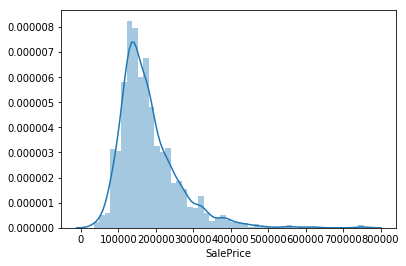

In [323]:
sns.distplot(df['SalePrice'])
plt.show()

### Many columns have 75% of values as 0. Removing them.

In [324]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,...,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,...,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,...,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [325]:
Q1 = df.SalePrice.quantile(0.05)
Q3 = df.SalePrice.quantile(0.98)
df = df[(df.SalePrice >= Q1) & (df.SalePrice <= Q3)]

In [326]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,...,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,70.030905,10532.057395,99.257542,445.610743,48.017660,567.174393,1060.802796,1164.567329,349.519500,5.193525,...,1.791759,478.942605,95.111847,47.058867,20.817513,3.662987,15.353201,2.555556,42.626932,179831.335541
std,21.453527,10121.467835,169.313245,444.183031,164.683687,438.798540,410.155731,364.275052,430.577648,45.352036,...,0.696122,199.359943,125.194691,65.223843,60.073634,30.372717,55.933453,38.847096,504.850057,62759.371505
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88000.000000
25%,60.000000,7667.500000,0.000000,0.000000,0.000000,224.000000,813.500000,894.000000,0.000000,0.000000,...,1.000000,352.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134000.000000
50%,69.000000,9505.000000,0.000000,400.000000,0.000000,470.000000,1001.000000,1095.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165000.000000
75%,79.000000,11506.000000,162.000000,715.000000,0.000000,812.500000,1289.500000,1383.000000,738.500000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,213370.000000
90%,91.000000,14192.800000,318.400000,1041.200000,123.400000,1232.400000,1580.000000,1657.400000,941.000000,0.000000,...,3.000000,741.200000,261.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,271000.000000
95%,101.000000,17049.100000,436.200000,1234.200000,401.100000,1459.900000,1719.100000,1787.100000,1122.600000,0.000000,...,3.000000,840.000000,333.200000,175.100000,177.300000,0.000000,160.100000,0.000000,0.000000,314831.700000
99%,134.000000,35707.140000,763.680000,1515.100000,852.760000,1770.520000,2059.440000,2131.940000,1352.360000,285.760000,...,3.000000,959.880000,503.780000,285.840000,256.100000,168.000000,268.100000,0.000000,700.000000,374420.000000


In [327]:
df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [328]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,196.0,706,150,856,856,854,1710,1,...,1,3,1,8,0,2,548,0,61,208500
1,80.0,9600,0.0,978,284,1262,1262,0,1262,0,...,0,3,1,6,1,2,460,298,0,181500
2,68.0,11250,162.0,486,434,920,920,866,1786,1,...,1,3,1,6,1,2,608,0,42,223500
3,60.0,9550,0.0,216,540,756,961,756,1717,1,...,0,3,1,7,1,3,642,0,35,140000
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,1,...,1,4,1,9,1,3,836,192,84,250000


### Pair Plot and Heat Map to understand if linear relationship exists or to check for multi collinearity

<Figure size 1440x720 with 0 Axes>

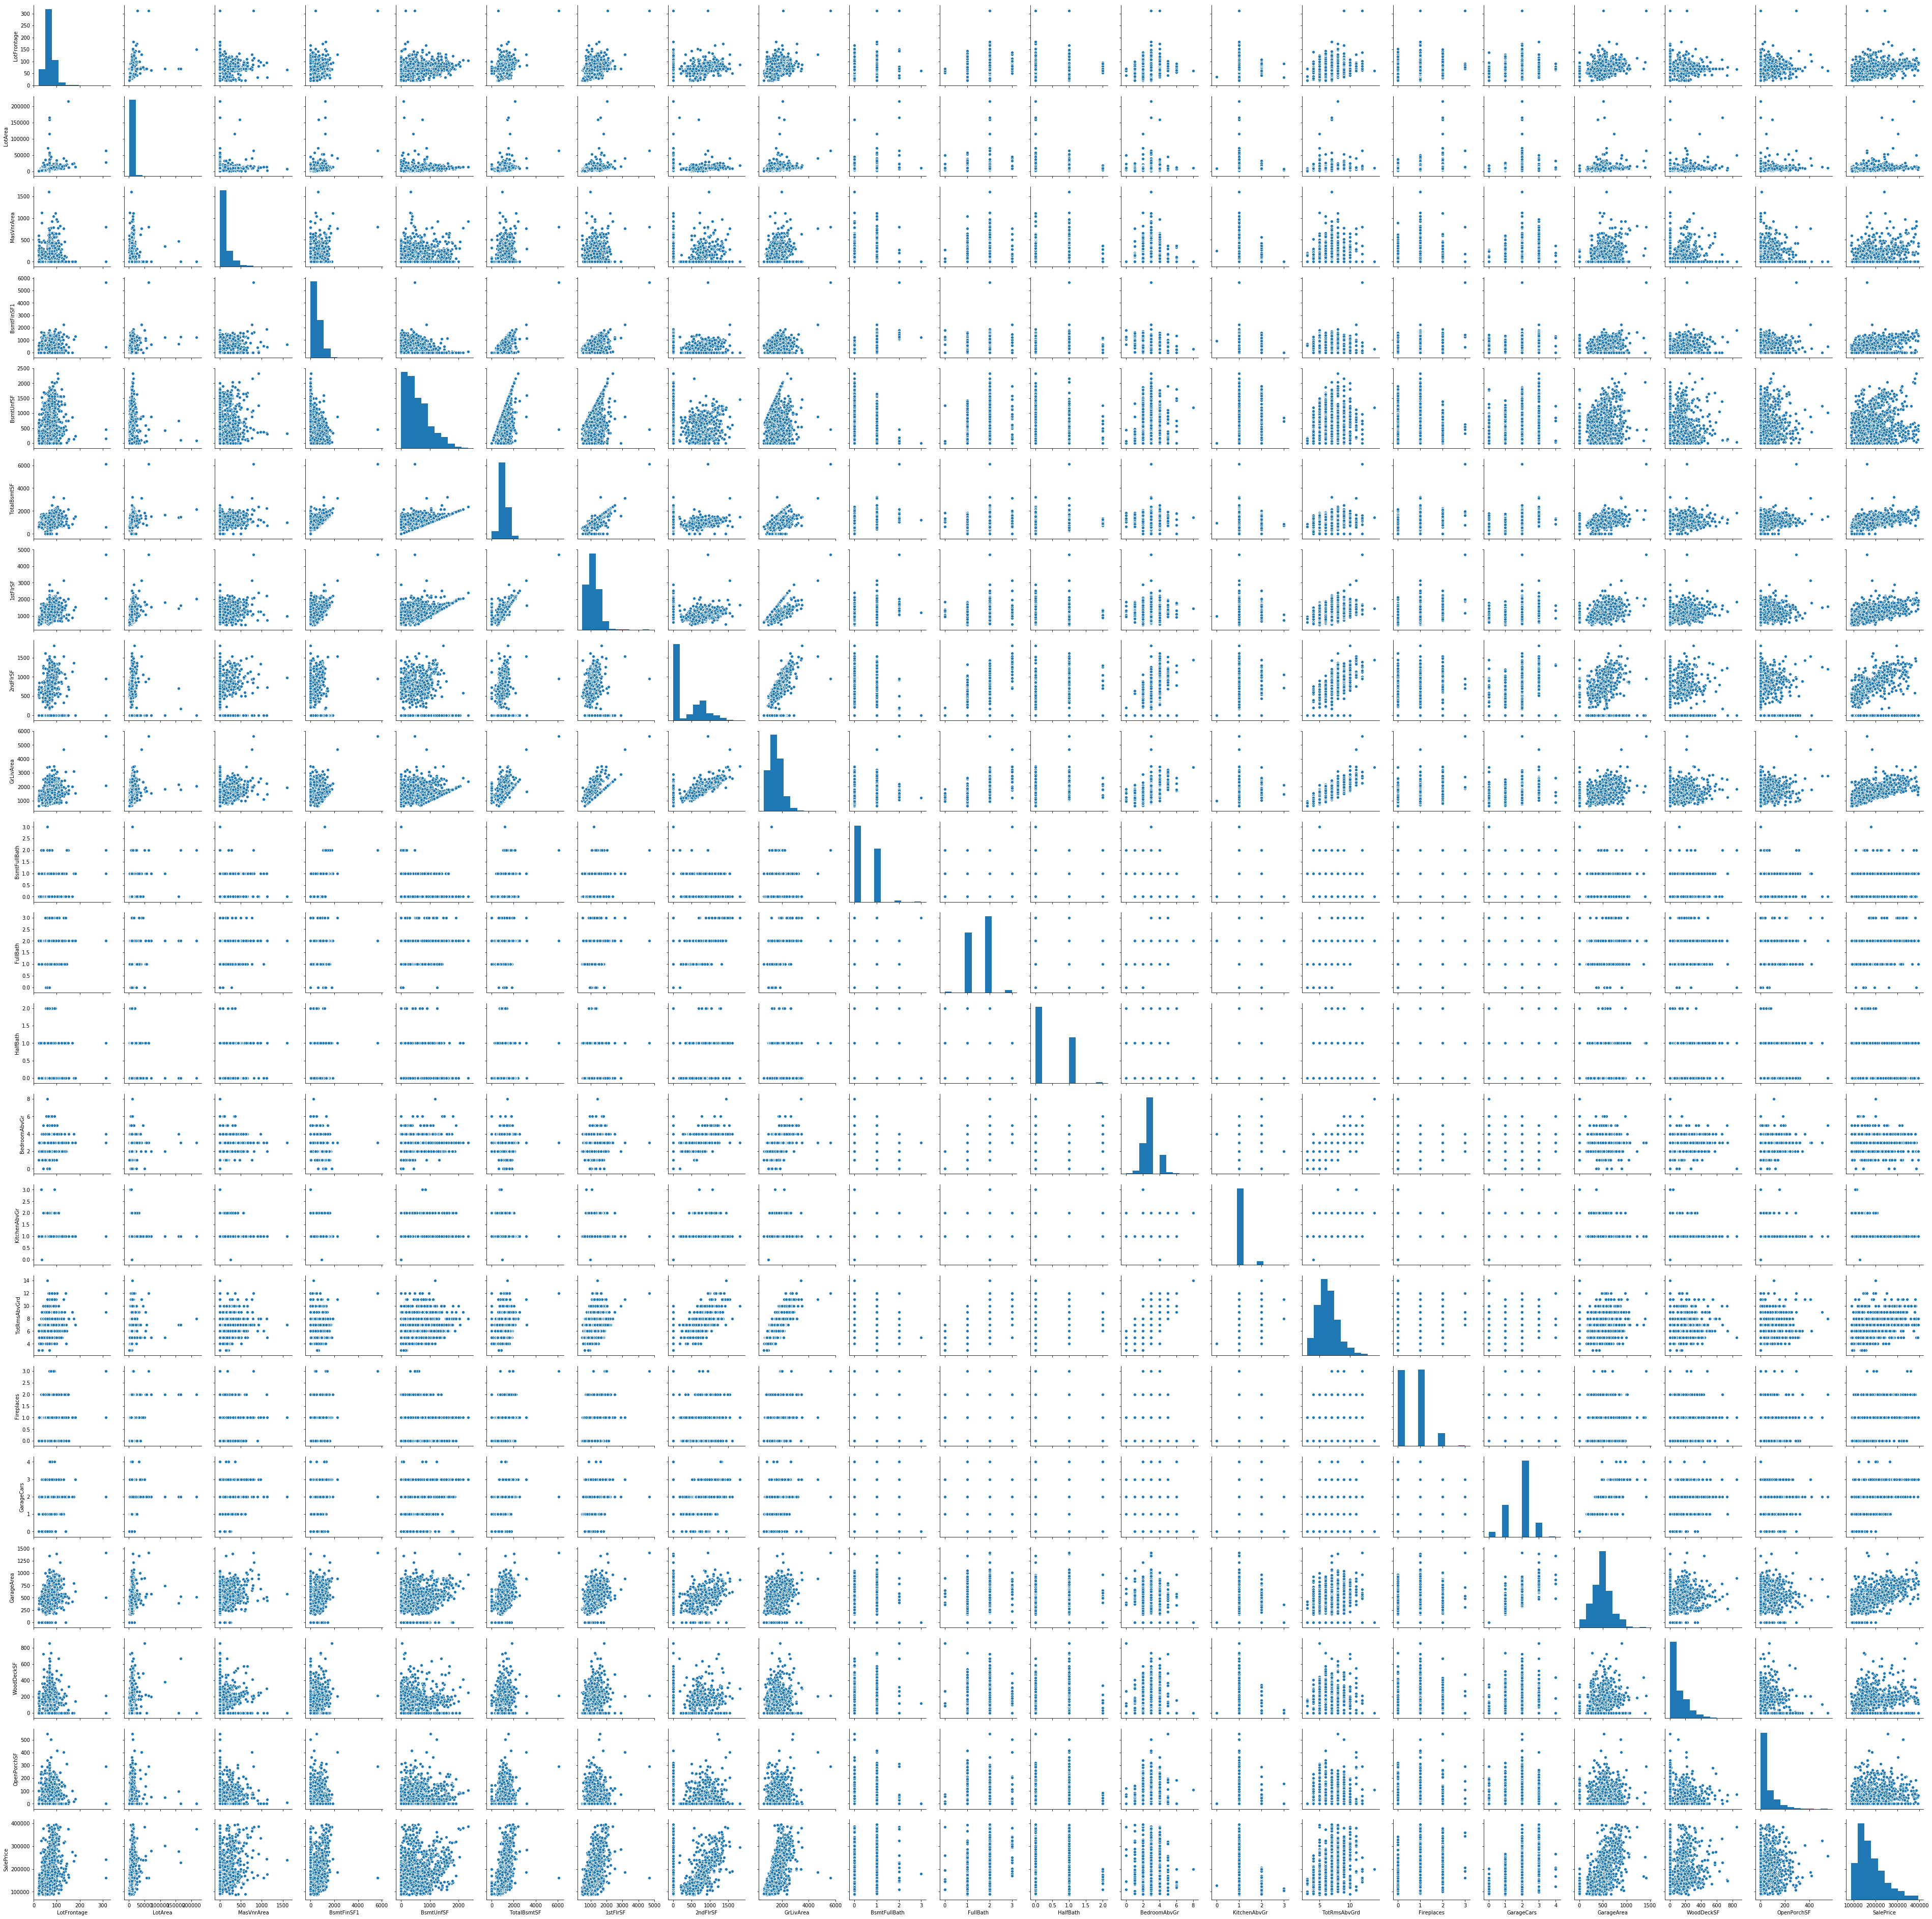

In [329]:
plt.figure(figsize=(20, 10))
sns.pairplot(df_numeric)
plt.show()

In [330]:
cor=df_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.303697,0.155117,0.197650,0.099410,0.341896,0.393944,0.040924,0.336496,0.089065,...,0.024021,0.217207,-0.004633,0.286220,0.203818,0.233214,0.295581,0.057878,0.115167,0.296771
LotArea,0.303697,1.000000,0.062178,0.193401,-0.013517,0.241765,0.282001,0.020277,0.230877,0.149003,...,-0.008271,0.098539,-0.014988,0.153684,0.257216,0.116450,0.146093,0.145982,0.071642,0.239283
MasVnrArea,0.155117,0.062178,1.000000,0.217028,0.098545,0.311765,0.285522,0.115701,0.312677,0.061963,...,0.160073,0.072666,-0.037490,0.205437,0.203152,0.317329,0.337031,0.117101,0.116963,0.387576
BsmtFinSF1,0.197650,0.193401,0.217028,1.000000,-0.536789,0.484598,0.399447,-0.190672,0.126126,0.648376,...,-0.042196,-0.146605,-0.076354,-0.043419,0.215180,0.159061,0.244714,0.175887,0.078871,0.305243
BsmtUnfSF,0.099410,-0.013517,0.098545,-0.536789,1.000000,0.403193,0.298325,-0.011629,0.216520,-0.444273,...,-0.057817,0.144573,0.041194,0.228475,0.029969,0.198351,0.166598,-0.022962,0.124296,0.205051
TotalBsmtSF,0.341896,0.241765,0.311765,0.484598,0.403193,1.000000,0.794981,-0.259358,0.365645,0.288965,...,-0.120160,-0.009733,-0.054956,0.184493,0.282713,0.367126,0.435713,0.194882,0.220331,0.544770
1stFlrSF,0.393944,0.282001,0.285522,0.399447,0.298325,0.794981,1.000000,-0.285237,0.499376,0.225610,...,-0.196107,0.079724,0.084926,0.332044,0.363331,0.373284,0.438545,0.197277,0.181303,0.531754
2ndFlrSF,0.040924,0.020277,0.115701,-0.190672,-0.011629,-0.259358,-0.285237,1.000000,0.683063,-0.198010,...,0.610639,0.488298,0.062755,0.610703,0.163983,0.137156,0.090035,0.063469,0.204632,0.270380
GrLivArea,0.336496,0.230877,0.312677,0.126126,0.216520,0.365645,0.499376,0.683063,1.000000,-0.010412,...,0.394039,0.507825,0.121444,0.808916,0.417767,0.394691,0.404792,0.204407,0.319747,0.637829
BsmtFullBath,0.089065,0.149003,0.061963,0.648376,-0.444273,0.288965,0.225610,-0.198010,-0.010412,1.000000,...,-0.053891,-0.170234,-0.041649,-0.098180,0.117118,0.101079,0.156148,0.165385,0.054839,0.210340


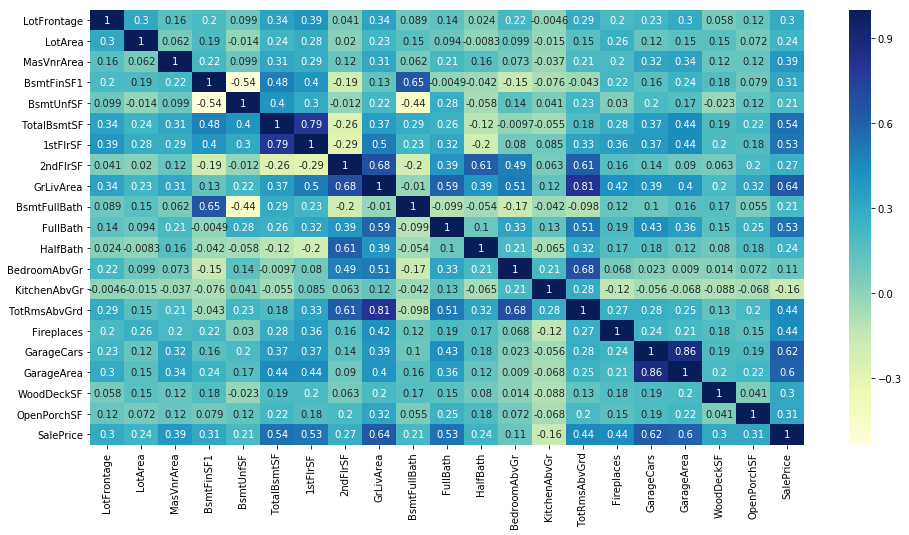

In [331]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### From the plot saleprice is not highly correlated with any of the other field. The maximum correlation is around .6 with living area, garage cars and garage area.

### we can see multicollinearity between living area and tot rooms availble and also between garage cars and garage area etc....

In [332]:
df_categorical = df.select_dtypes(include=['object','category'])
df_categorical

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_year
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal,6
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal,3
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal,6
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml,5
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal,5
5,50,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,10,2009,WD,Normal,5
6,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,8,2007,WD,Normal,6
7,60,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,11,2009,WD,Normal,3
8,50,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,4,2008,WD,Abnorml,1
9,190,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,1,2008,WD,Normal,1


### Dummy Varaible crceation for categorical variables.

In [333]:
df_dummies=pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBlt_year_2,GarageYrBlt_year_3,GarageYrBlt_year_4,GarageYrBlt_year_5,GarageYrBlt_year_6,GarageYrBlt_year_7,GarageYrBlt_year_0
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [334]:
df_new=pd.concat([df_numeric,df_dummies],axis=1)

In [335]:
X=df_new.drop('SalePrice',axis=1)
y=df_new['SalePrice']

### Scaling Data

In [336]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'GarageYrBlt_year_2', 'GarageYrBlt_year_3', 'GarageYrBlt_year_4',
       'GarageYrBlt_year_5', 'GarageYrBlt_year_6', 'GarageYrBlt_year_7',
       'GarageYrBlt_year_0'],
      dtype='object', length=268)

### Split into train and test data

In [339]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Using RFE to extract significant columns

In [340]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [342]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [343]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 137),
 ('LotArea', False, 33),
 ('MasVnrArea', False, 108),
 ('BsmtFinSF1', False, 129),
 ('BsmtUnfSF', False, 27),
 ('TotalBsmtSF', False, 18),
 ('1stFlrSF', False, 20),
 ('2ndFlrSF', False, 19),
 ('GrLivArea', False, 162),
 ('BsmtFullBath', False, 109),
 ('FullBath', False, 127),
 ('HalfBath', False, 98),
 ('BedroomAbvGr', False, 153),
 ('KitchenAbvGr', False, 32),
 ('TotRmsAbvGrd', False, 152),
 ('Fireplaces', False, 38),
 ('GarageCars', False, 186),
 ('GarageArea', False, 25),
 ('WoodDeckSF', False, 71),
 ('OpenPorchSF', False, 224),
 ('MSSubClass_30', False, 84),
 ('MSSubClass_40', False, 232),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 113),
 ('MSSubClass_60', False, 41),
 ('MSSubClass_70', False, 199),
 ('MSSubClass_75', False, 138),
 ('MSSubClass_80', False, 115),
 ('MSSubClass_85', False, 184),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 66),
 ('MSSubClass_160', False, 124),
 ('MSSubClass_180', False, 219),
 ('MSSubClass_190', Fa

In [344]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass_45', 'MSSubClass_90', 'Utilities_NoSeWa',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_CmentBd',
       'Exterior2nd_Other', 'BsmtQual_NA', 'BsmtCond_NA', 'BsmtExposure_NA',
       'BsmtFinType1_NA', 'Heating_Grav', 'Electrical_FuseP', 'GarageQual_NA',
       'GarageQual_Po', 'GarageYrBlt_year_0'],
      dtype='object')

In [345]:
X_train_rfe = X_train[col]

### Linear model building 

In [346]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [350]:
lm = sm.OLS(y_train.tolist(),X_train_rfe).fit()

In [351]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     7.749
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           1.41e-16
Time:                        22:31:02   Log-Likelihood:                -11806.
No. Observations:                 951   AIC:                         2.364e+04
Df Residuals:                     935   BIC:                         2.372e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
MSSubClass_45       -1.408e+05   3

### R-square and Adjusted R square are very low even though P values are below .05. This seems to be a bad model. Let exract columns using Ridge and Lasso regression

### RIDGE and LASSO Regression

### RIDGE Regression:

In [393]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [354]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [355]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084926,0.153410,0.000000,0.000000,0.0001,{'alpha': 0.0001},-18521.263865,-15802.836998,-17448.570400,-18378.278937,...,-17738.289743,1047.563299,28,-10071.261312,-11057.094366,-10860.008287,-10040.719158,-10298.015850,-10465.419795,417.021462
1,0.008565,0.000797,0.000392,0.000480,0.001,{'alpha': 0.001},-18520.805099,-15800.559815,-17448.330272,-18377.906184,...,-17737.545096,1048.245615,27,-10071.323772,-11057.029959,-10859.983555,-10040.749458,-10298.051116,-10465.427572,416.977695
2,0.008377,0.001016,0.000398,0.000488,0.01,{'alpha': 0.01},-18516.254810,-15779.072288,-17445.932135,-18374.205749,...,-17730.370804,1054.610829,26,-10071.936849,-11056.418867,-10859.736343,-10041.049288,-10298.401655,-10465.508600,416.552426
3,0.009374,0.000796,0.000797,0.000399,0.05,{'alpha': 0.05},-18496.795126,-15706.702683,-17435.347242,-18358.331424,...,-17703.435866,1074.647507,25,-10074.426088,-11054.292251,-10858.648250,-10042.315439,-10300.134249,-10465.963255,414.876029
4,0.007580,0.000797,0.000398,0.000488,0.1,{'alpha': 0.1},-18473.995911,-15645.514012,-17422.297468,-18339.698334,...,-17676.576666,1089.584367,24,-10077.067943,-11052.336976,-10857.333325,-10043.797512,-10302.731953,-10466.653542,413.064214


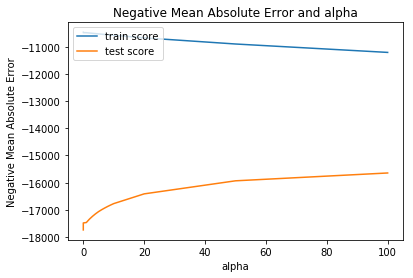

In [356]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### From above fig we can say the optimum value of lpha exists beween 5 to 10

In [357]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.97032547e+02,  7.52782585e+03,  1.79118683e+03,  3.09394107e+01,
       -5.00479608e+03,  8.86905354e+03,  6.87173941e+03,  9.62884111e+03,
        1.00281697e+04,  1.52013276e+03,  1.37209887e+03,  2.06757450e+03,
        8.54616060e+02, -3.22389357e+03, -1.82297985e+03,  3.31715951e+03,
        1.19265289e+03,  7.12367360e+03,  2.62484846e+03,  2.99162792e+02,
       -1.64260611e+03,  2.77441198e+02, -1.26589164e+03, -4.34052620e+02,
        1.93264465e+03,  8.83314107e+02, -1.12875096e+02, -1.19481476e+03,
        5.77887576e+02, -3.53371006e+01, -2.33536043e+03, -1.28008503e+03,
        2.17488756e+02,  2.30341243e+03,  6.07295497e+03,  1.30297078e+03,
        6.16993807e+03,  5.04594699e+03,  2.53219121e+03,  7.07168802e+02,
        4.53046206e+02,  7.80729840e+02,  2.17170923e+03,  1.42795199e+03,
        2.42361662e+03,  8.61036664e-27,  1.35378085e+03, -8.86006215e+02,
       -4.93113675e+02, -3.84986806e+02,  8.52896624e+02, -4.94932846e+03,
       -2.75059775e+01,  

### LASSO Regression

In [359]:
import warnings
warnings.filterwarnings('ignore')

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   18.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [360]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152193,0.024402,0.000798,3.991405e-04,0.0001,{'alpha': 0.0001},-18617.764817,-15801.459093,-17537.878915,-18385.800544,...,-17763.041301,1049.916075,28,-10077.411456,-11054.015490,-10860.865329,-10043.473332,-10304.573372,-10468.067796,414.064696
1,0.133044,0.006294,0.000399,4.888696e-04,0.001,{'alpha': 0.001},-18617.434087,-15801.349787,-17537.781257,-18385.638272,...,-17762.905531,1049.890731,27,-10077.414868,-11054.013187,-10860.864835,-10043.474124,-10304.575578,-10468.068518,414.062970
2,0.133843,0.013162,0.000199,3.988266e-04,0.01,{'alpha': 0.01},-18614.135192,-15800.261693,-17536.804929,-18384.362136,...,-17761.619613,1049.678390,26,-10077.455204,-11053.993626,-10860.876444,-10043.482913,-10304.600998,-10468.081837,414.048216
3,0.149395,0.026482,0.000998,5.840039e-07,0.05,{'alpha': 0.05},-18598.570818,-15795.549377,-17532.469779,-18378.685426,...,-17755.744503,1048.554199,25,-10077.633220,-11053.958671,-10860.938395,-10043.529349,-10304.746346,-10468.161196,413.995490
4,0.127458,0.008113,0.000800,3.997829e-04,0.1,{'alpha': 0.1},-18577.717194,-15790.019471,-17527.055124,-18372.935742,...,-17748.471434,1046.995647,24,-10077.858340,-11053.973280,-10861.018011,-10043.604980,-10304.930883,-10468.277099,413.942180


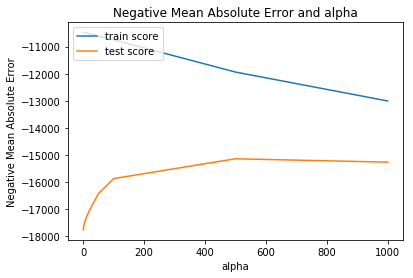

In [361]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [362]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [363]:
lasso.coef_

array([ 3.97358657e+02,  6.41947211e+03,  1.75240223e+03,  0.00000000e+00,
       -4.75145173e+03,  8.96609916e+03,  0.00000000e+00,  7.84437859e+01,
        1.89928812e+04,  1.66693477e+03,  8.60155355e+02,  1.62366282e+03,
        0.00000000e+00, -3.47751522e+03, -4.19514066e+02,  3.24674632e+03,
        1.11689228e+03,  6.68233154e+03,  2.35611808e+03,  3.88847435e+02,
       -1.16389521e+03,  6.30784189e+02, -2.79251502e+02, -0.00000000e+00,
        5.67118192e+02,  0.00000000e+00, -2.59213346e+02, -5.69776681e+02,
        0.00000000e+00, -3.43888469e+01, -2.74112713e+03, -2.26420904e+03,
        0.00000000e+00, -0.00000000e+00,  2.60794825e+03, -0.00000000e+00,
        8.29669813e+02,  0.00000000e+00,  1.69933191e+03,  6.58938652e+02,
        5.58940916e+02,  5.36907398e+02,  1.42413023e+03,  1.15615801e+03,
        1.61643606e+03, -0.00000000e+00,  1.19901387e+03, -7.03823311e+02,
       -2.82181247e+02, -1.38025747e+02,  5.41288446e+02, -3.91724152e+03,
        6.54158783e+00,  

### Final set of coefficients obtained after Lasso

In [364]:
final = pd.Series(lasso.coef_, index = X_train.columns)

In [367]:
final[(final!=0) == True]

LotFrontage                397.358657
LotArea                   6419.472109
MasVnrArea                1752.402235
BsmtUnfSF                -4751.451727
TotalBsmtSF               8966.099158
2ndFlrSF                    78.443786
GrLivArea                18992.881161
BsmtFullBath              1666.934766
FullBath                   860.155355
HalfBath                  1623.662819
KitchenAbvGr             -3477.515221
TotRmsAbvGrd              -419.514066
Fireplaces                3246.746319
GarageCars                1116.892279
GarageArea                6682.331538
WoodDeckSF                2356.118084
OpenPorchSF                388.847435
MSSubClass_30            -1163.895213
MSSubClass_40              630.784189
MSSubClass_45             -279.251502
MSSubClass_60              567.118192
MSSubClass_75             -259.213346
MSSubClass_80             -569.776681
MSSubClass_90              -34.388847
MSSubClass_120           -2741.127127
MSSubClass_160           -2264.209036
MSZoning_FV 

### Extracting top 10 positive related coeffients and top 10 negative related coeffients from Lasso and building Linear regression model

In [368]:
final_significant_coef = pd.concat([final.sort_values().head(10),
                     final.sort_values().tail(10)])

In [369]:
final_significant_coef

ExterQual_Gd            -6331.721840
BsmtQual_TA             -6012.366066
ExterQual_TA            -5855.443078
Condition2_PosN         -5616.410744
BsmtQual_Gd             -5219.146832
Neighborhood_Edwards    -5081.753975
BsmtUnfSF               -4751.451727
Neighborhood_OldTown    -3918.737467
LandSlope_Sev           -3917.241522
KitchenQual_TA          -3807.118789
SaleType_New             4439.913070
Neighborhood_StoneBr     4750.756659
Neighborhood_NridgHt     4819.999459
OverallQual_7            5495.589747
LotArea                  6419.472109
GarageArea               6682.331538
OverallQual_9            8767.257663
TotalBsmtSF              8966.099158
OverallQual_8            9855.311217
GrLivArea               18992.881161
dtype: float64

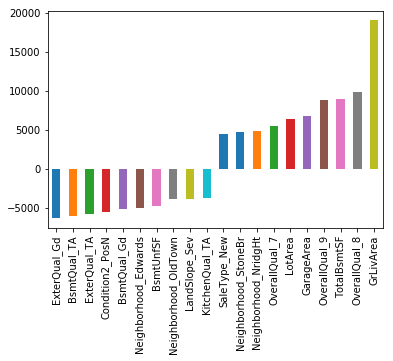

In [370]:
final_significant_coef.plot(kind='bar')

### As seen in pair plot living area and garage are positively related

### Building Linear Regression model

In [372]:
final_significant_coef.index

Index(['ExterQual_Gd', 'BsmtQual_TA', 'ExterQual_TA', 'Condition2_PosN',
       'BsmtQual_Gd', 'Neighborhood_Edwards', 'BsmtUnfSF',
       'Neighborhood_OldTown', 'LandSlope_Sev', 'KitchenQual_TA',
       'SaleType_New', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt',
       'OverallQual_7', 'LotArea', 'GarageArea', 'OverallQual_9',
       'TotalBsmtSF', 'OverallQual_8', 'GrLivArea'],
      dtype='object')

In [373]:
X_train_lasso = X_train[final_significant_coef.index]

In [374]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lasso = sm.add_constant(X_train_lasso)

In [375]:
lm = sm.OLS(y_train.tolist(),X_train_lasso).fit() 

In [376]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     268.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:00:52   Log-Likelihood:                -10952.
No. Observations:                 951   AIC:                         2.195e+04
Df Residuals:                     930   BIC:                         2.205e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

### Adjusted R square and R sqaure are good. Lets iterate the process to good P values and VIF

In [377]:
X_train_new = X_train_lasso.drop(["BsmtQual_Gd"], axis = 1)

In [378]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [380]:
lm = sm.OLS(y_train.tolist(),X_train_lm).fit() 

In [381]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     282.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:02:37   Log-Likelihood:                -10954.
No. Observations:                 951   AIC:                         2.195e+04
Df Residuals:                     931   BIC:                         2.204e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

In [382]:
X_train_new = X_train_new.drop(['LandSlope_Sev'], axis=1)

In [383]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [384]:
lm = sm.OLS(y_train.tolist(),X_train_lm).fit() 

In [385]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     297.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:04:37   Log-Likelihood:                -10955.
No. Observations:                 951   AIC:                         2.195e+04
Df Residuals:                     932   BIC:                         2.204e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

In [386]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,ExterQual_TA,12.17
1,ExterQual_Gd,10.84
17,OverallQual_8,2.27
8,KitchenQual_TA,2.05
12,OverallQual_7,1.88
16,TotalBsmtSF,1.74
2,BsmtQual_TA,1.68
14,GarageArea,1.65
15,OverallQual_9,1.64
18,GrLivArea,1.51


In [387]:
X_train_new = X_train_new.drop(['ExterQual_TA'], axis=1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train.tolist(),X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     302.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:06:51   Log-Likelihood:                -10971.
No. Observations:                 951   AIC:                         2.198e+04
Df Residuals:                     933   BIC:                         2.207e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

In [388]:
X_train_new = X_train_new.drop(['ExterQual_Gd'], axis=1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train.tolist(),X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     321.8
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:08:00   Log-Likelihood:                -10971.
No. Observations:                 951   AIC:                         2.198e+04
Df Residuals:                     934   BIC:                         2.206e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

In [389]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,OverallQual_8,2.06
14,TotalBsmtSF,1.73
10,OverallQual_7,1.71
6,KitchenQual_TA,1.69
12,GarageArea,1.65
1,BsmtQual_TA,1.58
16,GrLivArea,1.50
13,OverallQual_9,1.47
4,BsmtUnfSF,1.36
9,Neighborhood_NridgHt,1.27


### Final We got very model with Lasso linear regression and above are the most signicant features that impact the price.